In [2]:
import matplotlib.pyplot as plt
import incense
from common.helper.config import parseMongoConfig
loader = incense.ExperimentLoader(**parseMongoConfig('./config.ini', adapt='IncenseExperimentLoader'))

In [15]:
all_experiments = loader.find_by_name('CNN-IMU_Pamap2\(activity_labels\)')
len(all_experiments)

24

Training Time for one batch.


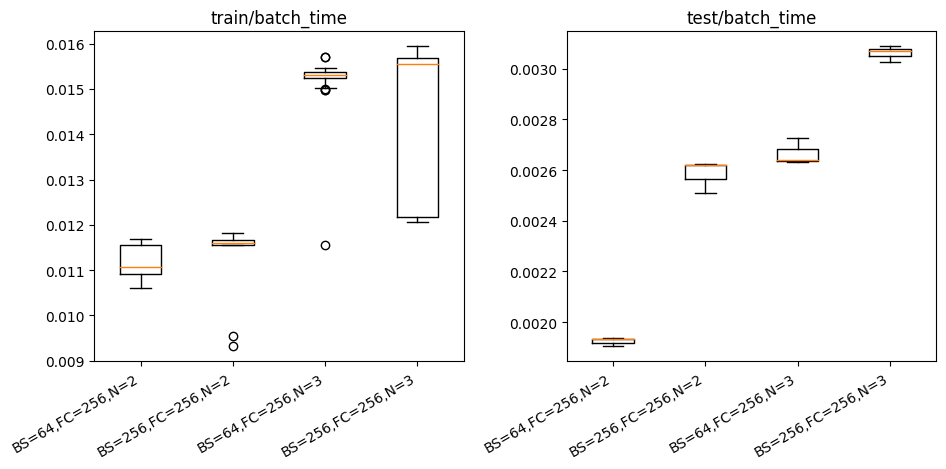

In [44]:
e = all_experiments[0]
experiments = {(e.to_dict()['config']['batch_size'], e.to_dict()['config']['cnn_imu_fc_features'], e.to_dict()['config']['cnn_imu_blocks']) : e for e in all_experiments}
fig, ax = plt.subplots(1,2)
fig.set_figwidth(fig.get_figwidth()*1.5)
ax[0].boxplot(x=[e.metrics['train/batch_time'] for e in experiments.values()], labels=[f'BS={bs},FC={f},N={n}' for bs, f, n in experiments.keys()])
ax[0].set_title('train/batch_time')
ax[1].boxplot(x=[e.metrics['test/batch_time'] for e in experiments.values()], labels=[f'BS={bs},FC={f},N={n}' for bs, f, n in experiments.keys()])
ax[1].set_title('test/batch_time')
fig.autofmt_xdate()
fig.tight_layout()
fig.show()
